In [1]:
import numpy as np
import pandas as pd
import matplotlib as math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display

In [2]:
plik = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
plik.columns = plik.columns.str.replace("_"," ")

# WORK TYPE

In [4]:
pd.crosstab(plik['work type'], plik['stroke'] == 1)

stroke,False,True
work type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


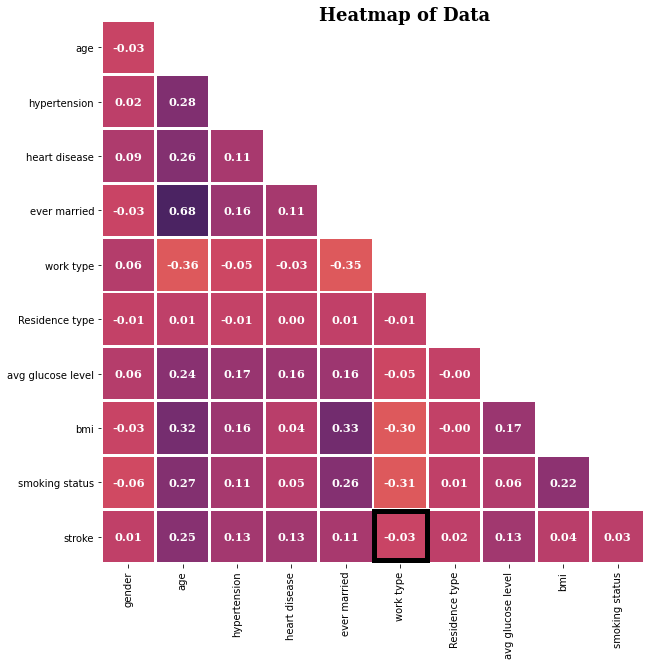

In [146]:
from IPython.display import Image
Image("OBRAZKI/work_type_stroke.png")

,work type,stroke,count,Risk of stroke
0,Govt_job,33,657,0.050228
1,Never_worked,0,22,0.000000
2,Private,149,2925,0.050940
3,Self-employed,65,819,0.079365
4,children,2,687,0.002911


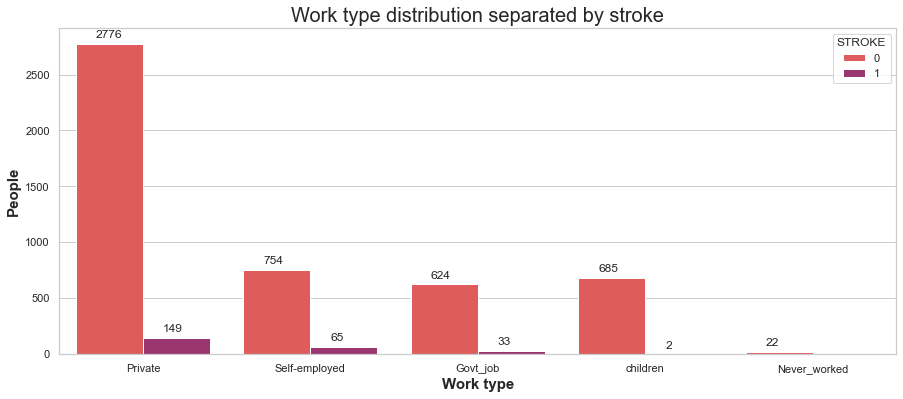

In [6]:

plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid")
ax=sns.countplot(x='work type',data=plik, palette='flare',hue='stroke', saturation =2.5)
plt.title("Work type distribution separated by stroke", fontsize = 20)
plt.legend(title='STROKE', loc='upper right')
for p in ax.patches:
        ax.annotate('{0:.0f}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+50))
        
plt.xlabel("Work type",fontsize=15, fontweight = "bold")
plt.ylabel("People",fontsize=15, fontweight = "bold")

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;}
td { 
    font-size: 15px
}
</style>
"""))


work_type_plik = plik.groupby(["work type"])['stroke'].agg(['sum','count']).reset_index()
work_type_plik['Risk of stroke'] = work_type_plik['sum'] / work_type_plik['count'] 
work_type_plik.rename(columns = {'sum':'stroke'}, inplace = True)
work_type_plik.sort_values(by = 'Risk of stroke', ascending = False)
work_type_plik.style.highlight_max()


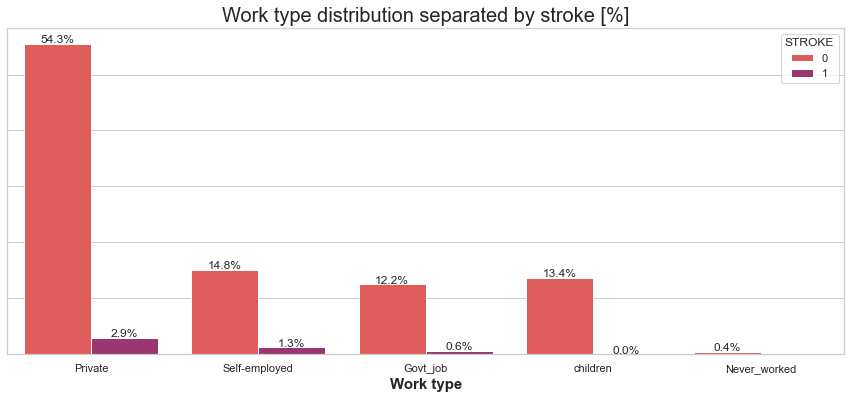

In [11]:
total = len(plik)


sns.set_theme(style="whitegrid")
plt.figure(figsize = (15,6))
plt.title("Work type distribution separated by stroke [%]",fontsize = 20)
ax = sns.countplot(x = 'work type', data= plik, saturation = 2.5, palette = 'flare', hue = "stroke")
plt.xlabel("Work type",fontsize=15, fontweight = "bold")
plt.legend(title='STROKE', loc='upper right')

for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x,y), ha = "center")

ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False)

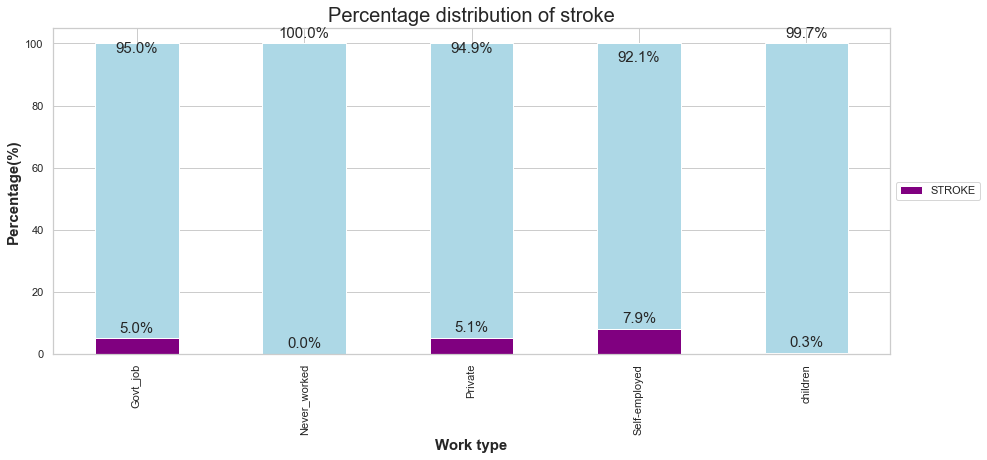

In [112]:
pd.crosstab(plik['work type'], plik['stroke'] == 0)
work_type_plik = pd.crosstab(plik['work type'], plik['stroke'] == 0)
stacked_data_work = work_type_plik.apply(lambda x: x*100/sum(x), axis=1)
sns.set_theme(style="whitegrid")


ax = stacked_data_work.plot(kind="bar", stacked=True, figsize = (15,6), color= ("purple","lightblue"))
plt.title("Percentage distribution of stroke",fontsize=20)
plt.xlabel("Work type", fontsize = 15, fontweight = "bold")
plt.ylabel("Percentage(%)", fontsize = 15, fontweight = "bold")
ax.legend(['STROKE'],loc='center left', bbox_to_anchor=(1, 0.5))

for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height())
    x = p.get_x() + 0.25 
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 15)
    
    
    

# Residence type

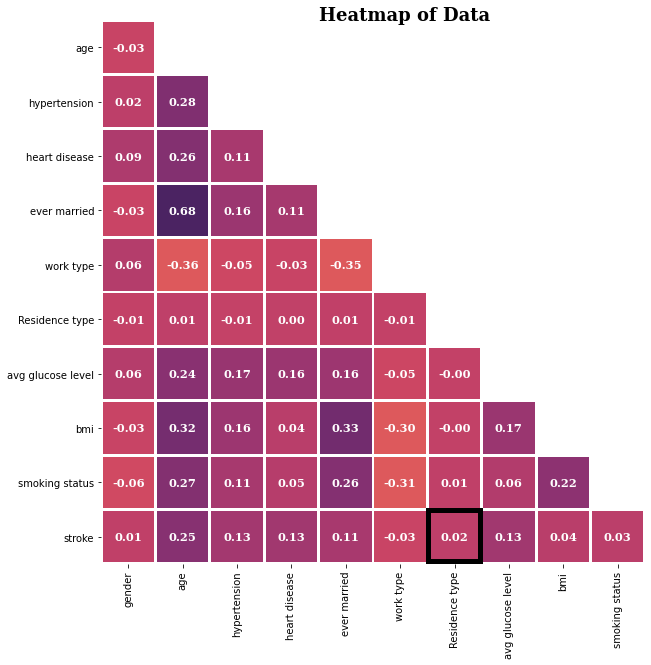

In [147]:
from IPython.display import Image
Image("OBRAZKI/residence_stroke.png")

In [5]:
pd.crosstab(plik['Residence type'], plik['stroke'] == 1)

stroke,False,True
Residence type,,
Rural,2400,114
Urban,2461,135


,Residence type,stroke,count,risk of stroke
1,Urban,135,2596,0.052003
0,Rural,114,2514,0.045346


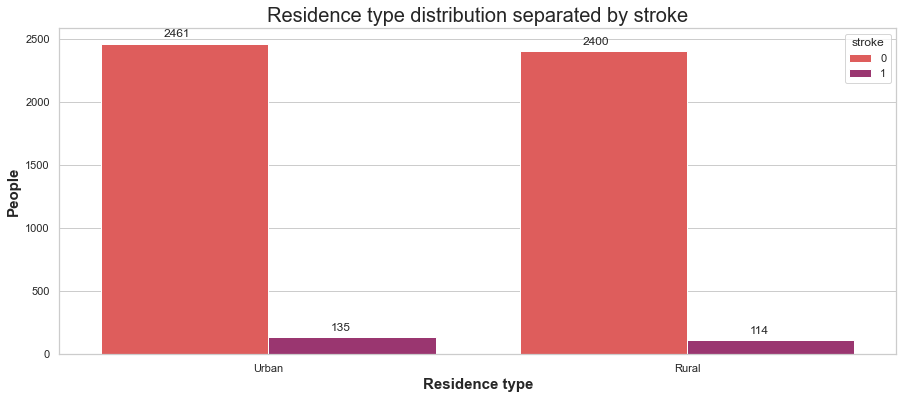

In [261]:
plt.figure(figsize = (15,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Residence type", data=plik, palette="flare", hue= 'stroke', saturation =2.5)
plt.title("Residence type distribution separated by stroke", fontsize = 20)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+.15, p.get_height()+50))
    
plt.xlabel("Residence type",fontsize=15, fontweight = "bold")
plt.ylabel("People",fontsize=15, fontweight = "bold")

residence_type_plik = plik.groupby(["Residence type"])['stroke'].agg(['sum','count']).reset_index()
residence_type_plik['risk of stroke'] = residence_type_plik['sum'] / residence_type_plik['count'] 
residence_type_plik.rename(columns = {'sum':'stroke'}, inplace = True)
residence_type_plik.sort_values(by = 'risk of stroke', ascending = False)

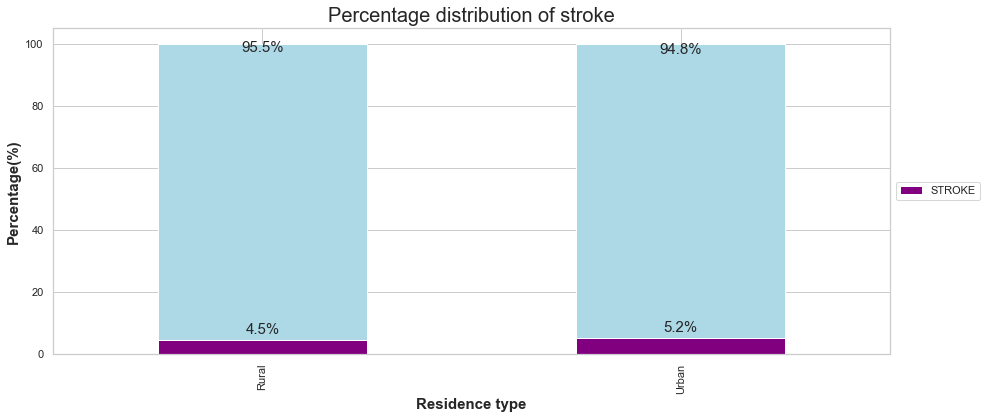

In [178]:
residence_type_plik = pd.crosstab(plik['Residence type'], plik['stroke'] == 0)

stacked_data_residence = residence_type_plik.apply(lambda x: x*100/sum(x), axis=1)

sns.set_theme(style="whitegrid")
ax = stacked_data_residence.plot(kind="bar", stacked=True, figsize = (15,6), color= ("purple", "lightblue"))
plt.title("Percentage distribution of stroke",fontsize=20)
plt.xlabel("Residence type", fontsize = 15, fontweight = "bold")
plt.ylabel("Percentage(%)", fontsize = 15, fontweight = "bold")
ax.legend(['STROKE'],loc='center left', bbox_to_anchor=(1, 0.5))

for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height())
    x = p.get_x() + 0.25 
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 15)

# BMI

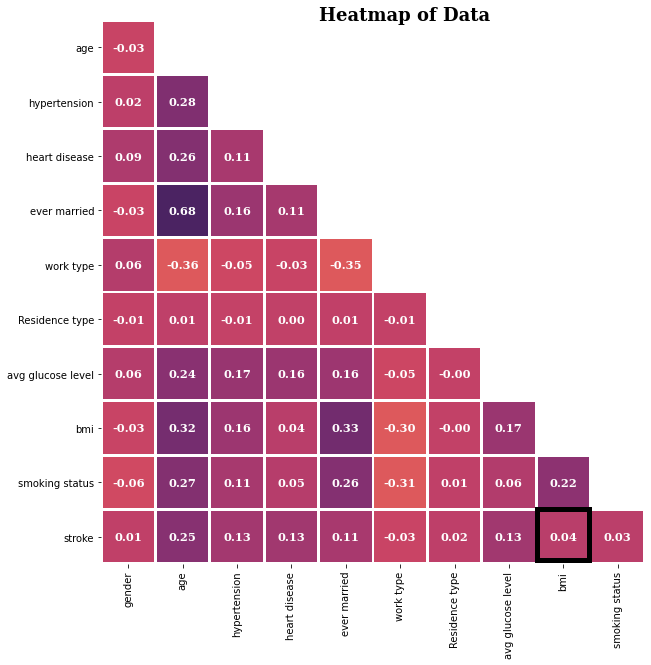

In [153]:
from IPython.display import Image
Image("OBRAZKI/bmi_stroke.png")

#### Missing data 

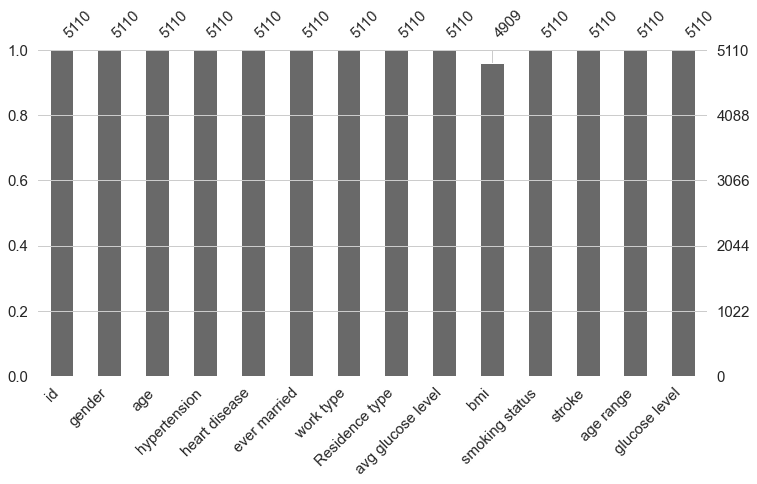

In [26]:
import missingno as msno

msno.bar(plik, sort = 'descending', 
         fontsize =15,
         labels = 'off',filter = 'top',figsize = (12,6))

plt.show()

In [6]:
plik['bmi'].fillna((plik['bmi'].median()), inplace=True)
plik['bmi'].median()

28.1

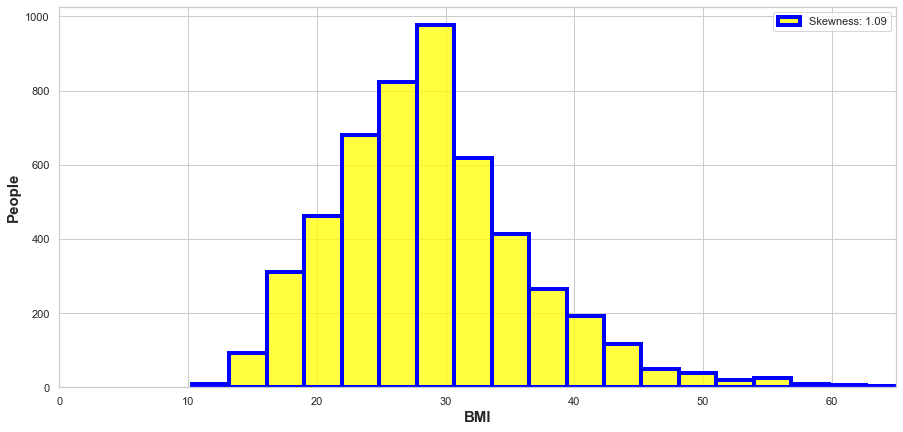

In [40]:
plt.figure(figsize=(15,7))
h = sns.histplot(plik["bmi"], bins= 30, color = "yellow", ec="blue",linewidth = 4,label = 'Skewness: %.2f'%(plik['bmi'].skew()))
plt.legend(loc = 'best')
plt.xlabel("BMI",fontsize=15, fontweight = "bold")
plt.ylabel("People",fontsize=15, fontweight = "bold")
plt.xlim(0, 65)
plt.show()

#### Distribution of weight status among population

In [8]:
plik.loc[plik['bmi'] < 18.5, 'weight'] = 'underweight'
plik.loc[(plik['bmi'] >= 18.5) & (plik['bmi'] < 25), 'weight'] = 'normal weight'
plik.loc[(plik['bmi'] >= 25) & (plik['bmi'] < 40), 'weight'] = 'overweight'
plik.loc[plik['bmi'] >= 40, 'weight'] = 'obesity'
plik['weight'].value_counts()


overweight       3116
normal weight    1243
obesity           414
underweight       337
Name: weight, dtype: int64

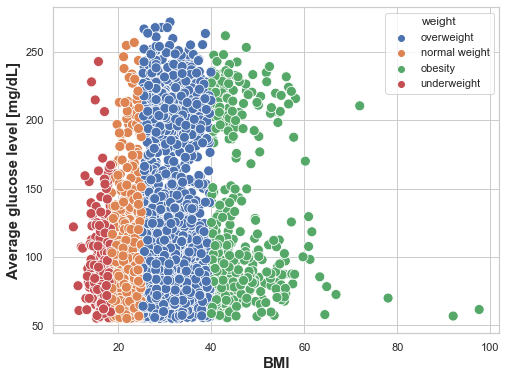

In [34]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'bmi', y = 'avg glucose level', hue = 'weight', data = plik, s=100)
plt.xlabel('BMI',fontsize=15, fontweight = "bold");
plt.ylabel('Average glucose level [mg/dL]',fontsize=15, fontweight = "bold");
plt.show();

In [9]:
pd.crosstab(plik['weight'], plik['stroke'] == 1)

stroke,False,True
weight,,
normal weight,1208,35
obesity,395,19
overweight,2922,194
underweight,336,1


In [21]:
#prawdopodobieństwo
weight_type_plik = plik.groupby(['weight'])['stroke'].agg(['sum','count']).reset_index()
weight_type_plik['risk of stroke'] = weight_type_plik['sum'] / weight_type_plik['count'] 
weight_type_plik.rename(columns = {'sum':'stroke'}, inplace = True)
weight_type_plik.style.highlight_max()

,weight,stroke,count,risk of stroke
0,normal weight,35,1243,0.028158
1,obesity,19,414,0.045894
2,overweight,194,3116,0.062259
3,underweight,1,337,0.002967


,weight,stroke,count,risk of stroke
0,normal weight,35,1243,0.028158
1,obesity,19,414,0.045894
2,overweight,194,3116,0.062259
3,underweight,1,337,0.002967


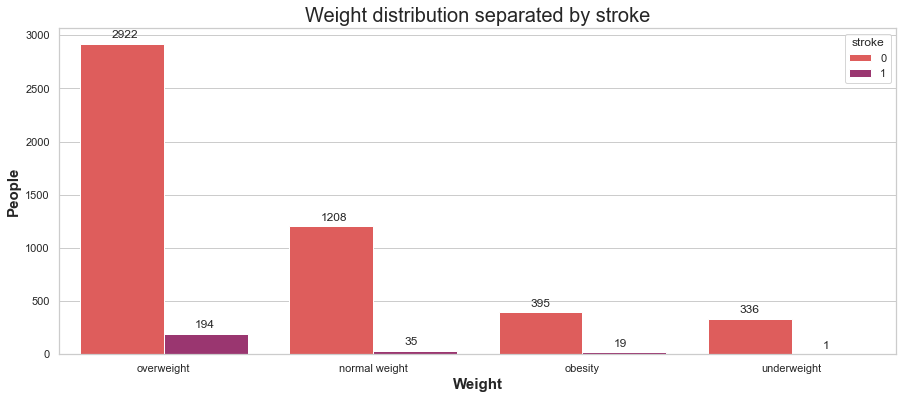

In [9]:
plt.figure(figsize=(15,6))

sns.set_theme(style="whitegrid")
plt.title("Weight distribution separated by stroke", fontsize = 20)

ax = sns.countplot(x='weight', data=plik, palette='flare',hue='stroke', saturation =2.5)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+.15, p.get_height()+50))
plt.xlabel("Weight",fontsize=15, fontweight = "bold")
plt.ylabel("People",fontsize=15, fontweight = "bold")


weight_type_plik = plik.groupby(['weight'])['stroke'].agg(['sum','count']).reset_index()
weight_type_plik['risk of stroke'] = weight_type_plik['sum'] / weight_type_plik['count'] 
weight_type_plik.rename(columns = {'sum':'stroke'}, inplace = True)
weight_type_plik.style.highlight_max()

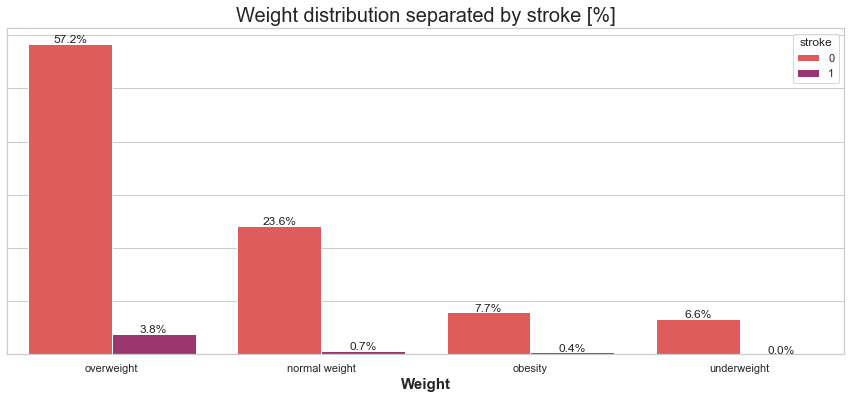

In [23]:
total = len(plik)
plt.figure(figsize = (15,6))
ax = sns.countplot(x = "weight", data = plik, saturation = 2.5, palette = 'flare', hue = "stroke")
plt.title("Weight distribution separated by stroke [%]",fontsize = 20)
plt.xlabel("Weight",fontsize=15, fontweight = "bold")

for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x,y), ha = "center")

ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False)   
plt.show()

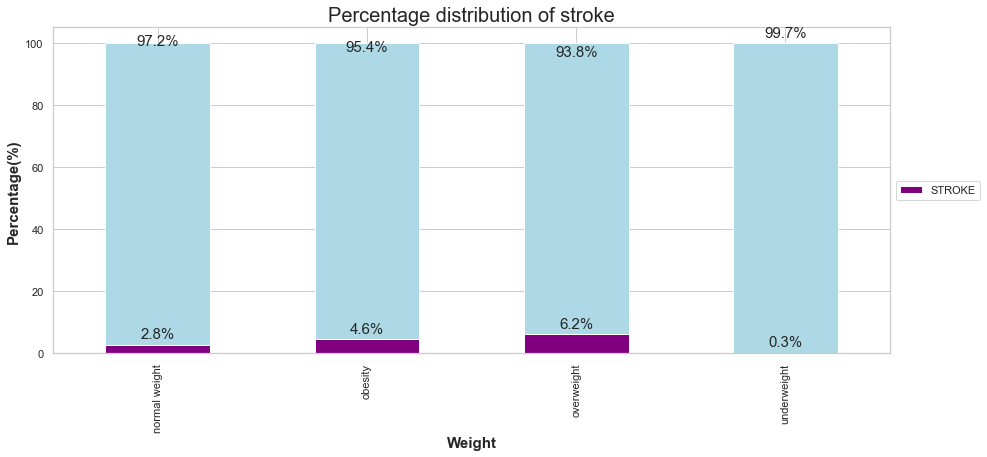

In [24]:
weight_type_plik = pd.crosstab(plik['weight'], plik['stroke'] == 0)

stacked_data_weight = weight_type_plik.apply(lambda x: x*100/sum(x), axis=1)

sns.set_theme(style="whitegrid")
ax = stacked_data_weight.plot(kind="bar", stacked=True, figsize = (15,6), color= ("purple", "lightblue"))
plt.title("Percentage distribution of stroke",fontsize=20)
plt.xlabel("Weight", fontsize = 15, fontweight = "bold")
plt.ylabel("Percentage(%)", fontsize = 15, fontweight = "bold")
ax.legend(['STROKE'],loc='center left', bbox_to_anchor=(1, 0.5))

for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height())
    x = p.get_x() + 0.25 
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 15)

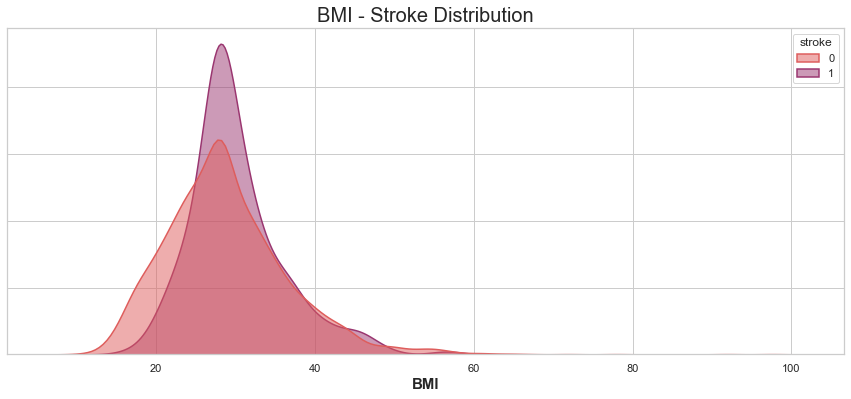

In [46]:
plt.figure(figsize = (15,6))
ax = sns.kdeplot(
   data=plik, x="bmi", hue="stroke",
   fill=True, common_norm=False, palette="flare",
   alpha=.5, linewidth=1.5,
)


ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False)


plt.xlabel('BMI',fontsize=15, fontweight = "bold")
plt.title('BMI - Stroke Distribution',fontsize=20)
plt.show()

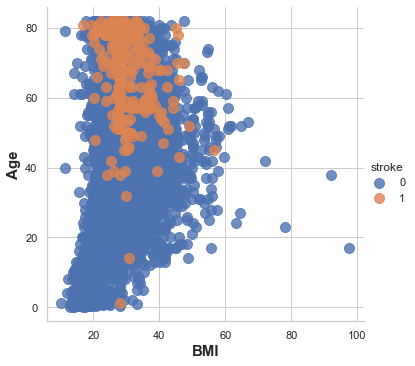

In [47]:

sns.lmplot( x="bmi", y="age", data=plik, fit_reg=False, hue='stroke', legend=True, scatter_kws={"s": 100});
plt.xlabel('BMI',fontsize=15, fontweight = "bold");
plt.ylabel('Age',fontsize=15, fontweight = "bold");
plt.show();

# SMOKING STATUS

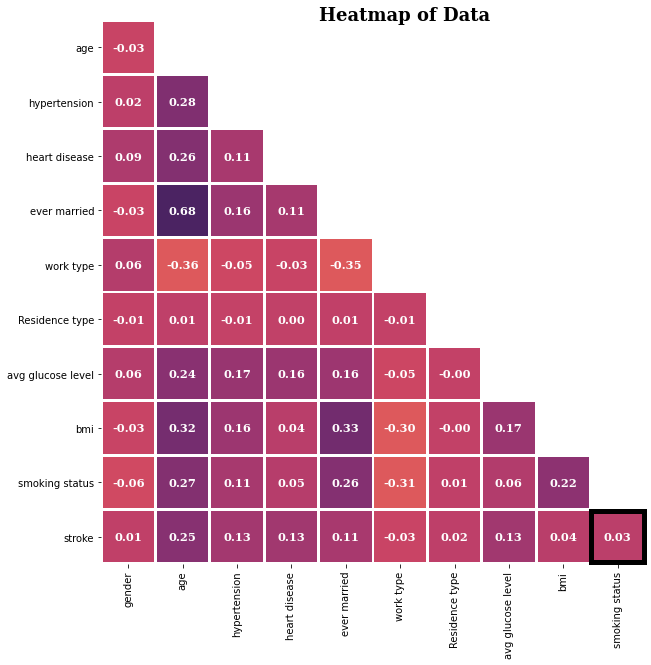

In [224]:
from IPython.display import Image
Image("OBRAZKI/smokers_stroke.png")

In [10]:
pd.crosstab(plik['smoking status'], plik['stroke'] == 1)

stroke,False,True
smoking status,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


,smoking status,stroke,count,risk of stroke
0,Unknown,47,1544,0.030440
1,formerly smoked,70,885,0.079096
2,never smoked,90,1892,0.047569
3,smokes,42,789,0.053232


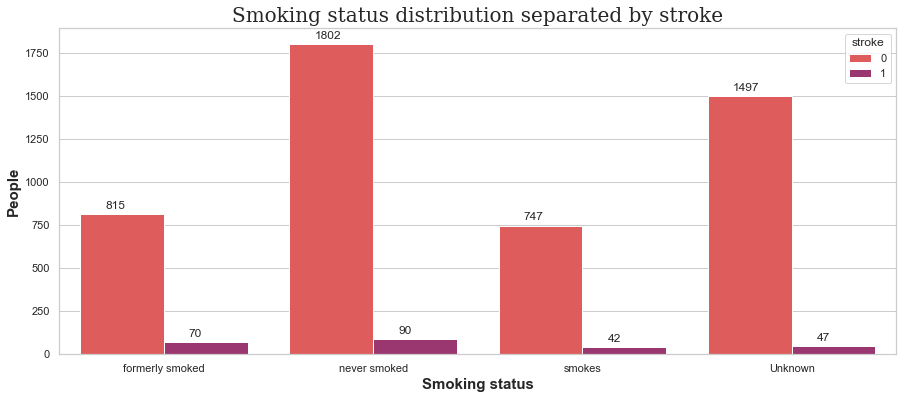

In [10]:
plt.figure(figsize=(15,6))

sns.set_theme(style="whitegrid")
ax = sns.countplot(x='smoking status', data=plik, palette='flare',hue='stroke', saturation =2.5)
plt.title("Smoking status distribution separated by stroke", fontsize = 20, fontfamily='serif')
plt.xlabel("Smoking status",fontsize=15, fontweight = "bold")
plt.ylabel("People",fontsize=15, fontweight = "bold")

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+.12, p.get_height()+30))


smoking_type_plik = plik.groupby(['smoking status'])['stroke'].agg(['sum','count']).reset_index()
smoking_type_plik['risk of stroke'] = smoking_type_plik['sum'] / smoking_type_plik['count'] 
smoking_type_plik.rename(columns = {'sum':'stroke'}, inplace = True)
smoking_type_plik.sort_values(by = 'risk of stroke', ascending = False)
smoking_type_plik.style.highlight_max()

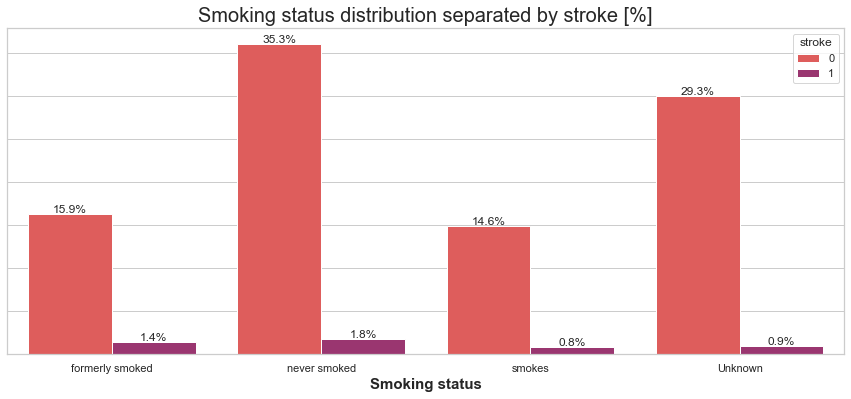

In [269]:
total = len(plik)

plt.figure(figsize = (15,6))
ax = sns.countplot(x = "smoking status", data= plik, saturation = 2.5, palette = 'flare', hue = "stroke")
plt.title("Smoking status distribution separated by stroke [%]",fontsize = 20)
plt.xlabel("Smoking status",fontsize=15, fontweight = "bold")

for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x,y), ha = "center")
    
ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False)   
plt.show()

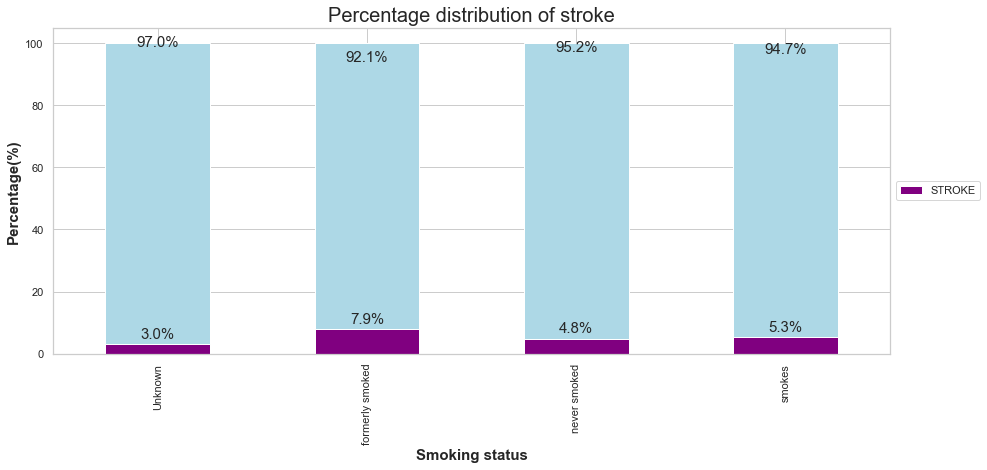

In [204]:
smoking_type_plik = pd.crosstab(plik['smoking status'], plik['stroke'] == 0)

stacked_data_smoking = smoking_type_plik.apply(lambda x: x*100/sum(x), axis=1)

sns.set_theme(style="whitegrid")
ax = stacked_data_smoking.plot(kind="bar", stacked=True, figsize = (15,6), color= ("purple", "lightblue"))
plt.title("Percentage distribution of stroke",fontsize=20)
plt.xlabel("Smoking status", fontsize = 15, fontweight = "bold")
plt.ylabel("Percentage(%)", fontsize = 15, fontweight = "bold")
ax.legend(['STROKE'],loc='center left', bbox_to_anchor=(1, 0.5))

for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height())
    x = p.get_x() + 0.25 
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 15)

# Average glusose level

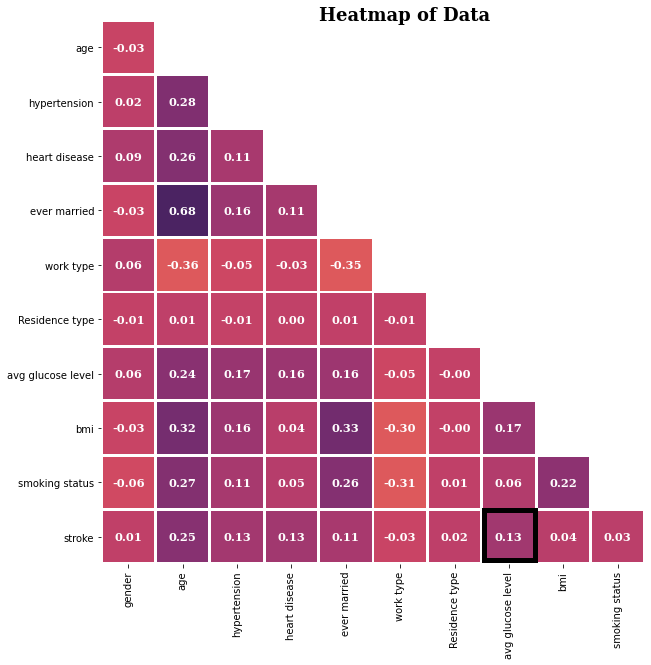

In [225]:
from IPython.display import Image
Image("OBRAZKI/glucose_stroke.png")

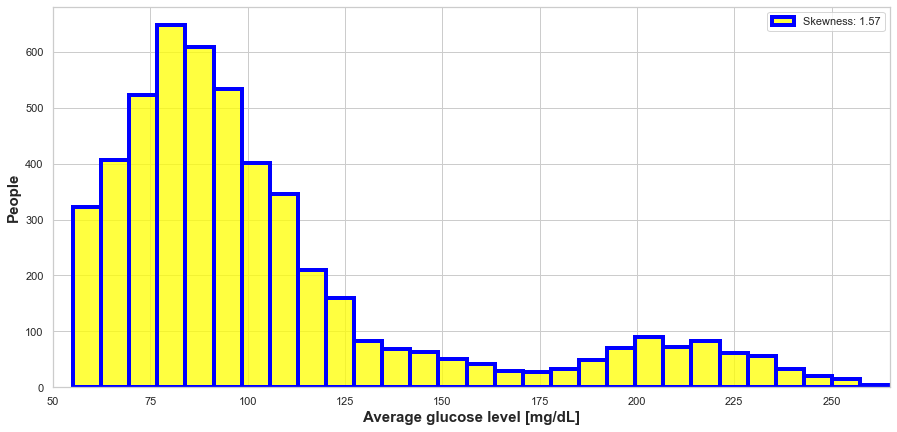

In [270]:
plt.figure(figsize=(15,7))
h = sns.histplot(plik["avg glucose level"], bins= 30, color = "yellow", ec="blue", linewidth = 4, label = 'Skewness: %.2f'%(plik["avg glucose level"].skew()))
plt.legend(loc = "best")
plt.xlabel("Average glucose level [mg/dL]",fontsize=15, fontweight = "bold")
plt.ylabel("People",fontsize=15, fontweight = "bold")
plt.xlim(50, 265)
plt.show()


#### Distribution of glucose level among population

In [11]:
plik.loc[plik['avg glucose level'] < 70, 'glucose level'] = 'Hypoglycemia'
plik.loc[(plik['avg glucose level'] >= 70) & (plik['avg glucose level'] < 99), 'glucose level'] = 'Normal glucose level'
plik.loc[(plik['avg glucose level'] >= 99) & (plik['avg glucose level'] < 126), 'glucose level'] = 'Prediabetic state'
plik.loc[plik['avg glucose level'] >= 126, 'glucose level'] = 'Diabetes'

plik['glucose level'].value_counts()

Normal glucose level    2315
Prediabetic state       1060
Diabetes                 981
Hypoglycemia             754
Name: glucose level, dtype: int64

In [12]:
pd.crosstab(plik['glucose level'], plik['stroke'] == 1)

stroke,False,True
glucose level,,
Diabetes,881,100
Hypoglycemia,727,27
Normal glucose level,2231,84
Prediabetic state,1022,38


,glucose level,stroke,count,risk of stroke
0,Diabetes,100,981,0.101937
1,Hypoglycemia,27,754,0.035809
2,Normal glucose level,84,2315,0.036285
3,Prediabetic state,38,1060,0.035849


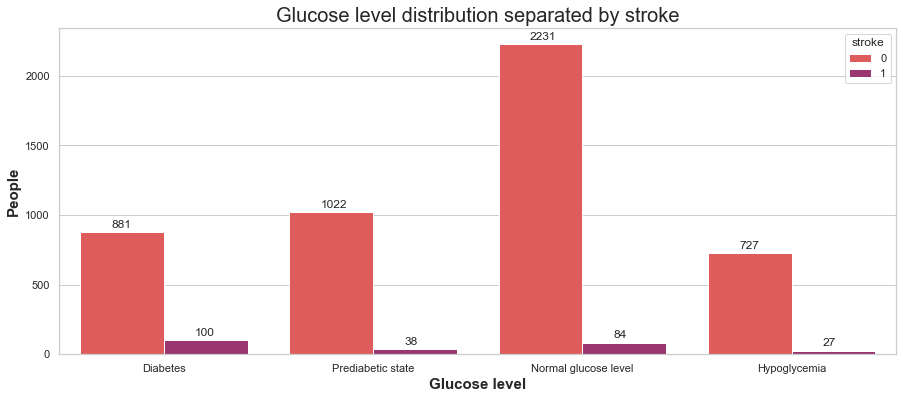

In [13]:
plt.figure(figsize=(15,6))

sns.set_theme(style="whitegrid")
plt.title("Glucose level distribution separated by stroke",fontsize = 20)

ax = sns.countplot(x='glucose level', data=plik, palette='flare',hue='stroke', saturation =2.5)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+.15, p.get_height()+30))

plt.xlabel('Glucose level',fontsize=15,fontweight = "bold")
plt.ylabel('People',fontsize=15,fontweight = "bold")


glucose_type_plik = plik.groupby(['glucose level'])['stroke'].agg(['sum','count']).reset_index()
glucose_type_plik['risk of stroke'] = glucose_type_plik['sum'] / glucose_type_plik['count']
glucose_type_plik.rename(columns = {'sum':'stroke'}, inplace = True)
glucose_type_plik.sort_values(by = 'risk of stroke', ascending = False)
glucose_type_plik.style.highlight_max()

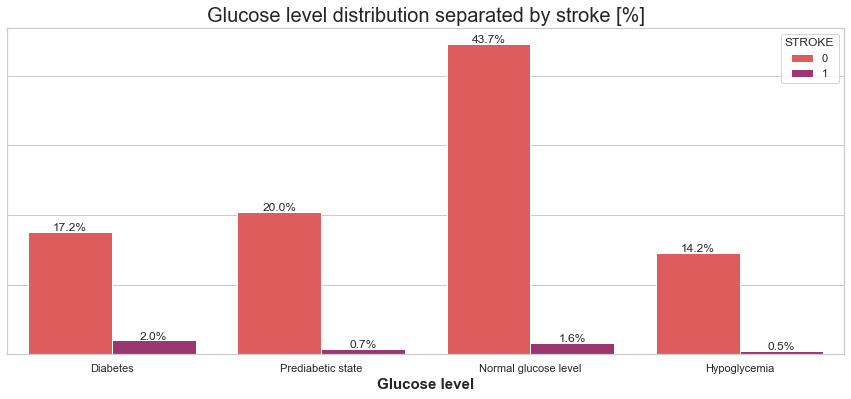

In [276]:
total = len(plik)

plt.figure(figsize = (15,6))

ax = sns.countplot(x = "glucose level", data= plik, saturation = 2.5, palette = 'flare', hue = "stroke")
plt.title("Glucose level distribution separated by stroke [%]",fontsize = 20)
plt.xlabel('Glucose level',fontsize=15,fontweight = "bold")
plt.legend(title='STROKE', loc='upper right')

for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x,y), ha = "center")
    
ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False)
plt.show()

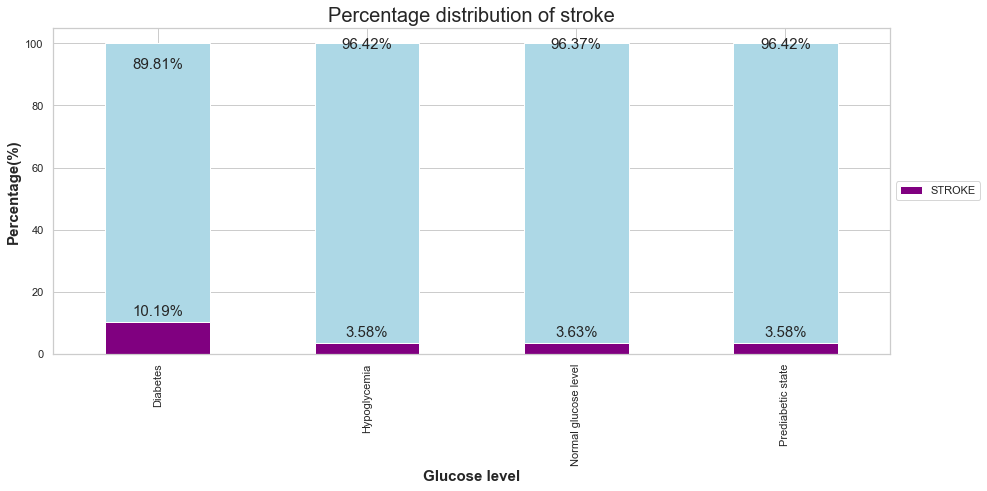

In [213]:
glucose_type_plik = pd.crosstab(plik['glucose level'], plik['stroke'] == 0)

stacked_data_glucose = glucose_type_plik.apply(lambda x: x*100/sum(x), axis=1)

sns.set_theme(style="whitegrid")
ax = stacked_data_glucose.plot(kind="bar", stacked=True, figsize = (15,6), color= ("purple", "lightblue"))
plt.title("Percentage distribution of stroke",fontsize=20)
plt.xlabel("Glucose level", fontsize = 15, fontweight = "bold")
plt.ylabel("Percentage(%)", fontsize = 15, fontweight = "bold")
ax.legend(['STROKE'],loc='center left', bbox_to_anchor=(1, 0.5))

for p in ax.patches:
    percentage = "{0:0.2f}%".format(p.get_height())
    x = p.get_x() + 0.25 
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 15)

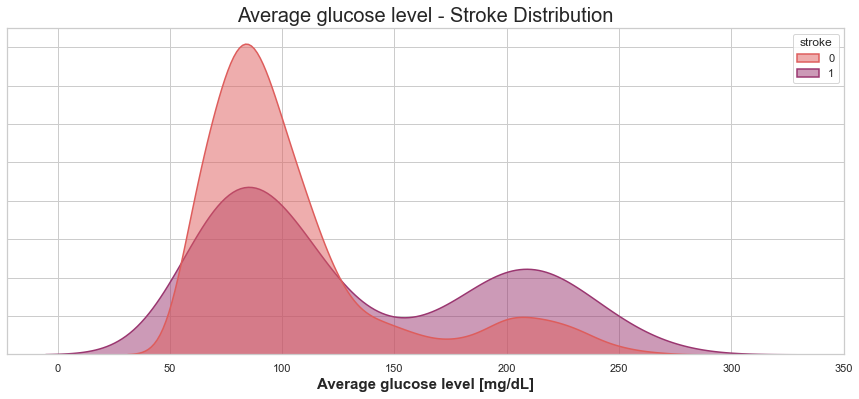

In [277]:
plt.figure(figsize = (15,6))

ax = sns.kdeplot(
   data=plik, x="avg glucose level", hue="stroke",
   fill=True, common_norm=False, palette="flare",
   alpha=.5, linewidth=1.5,
)

ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False)


plt.xlabel('Average glucose level [mg/dL]',fontsize=15,fontweight = "bold")
plt.title('Average glucose level - Stroke Distribution',fontsize=20)
plt.show()

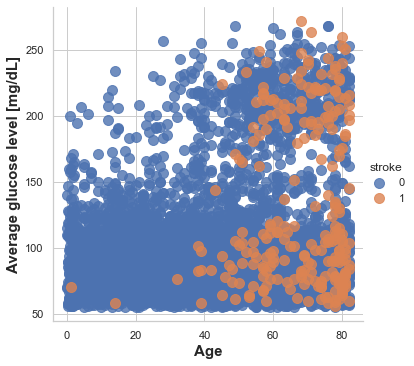

In [38]:

sns.lmplot( x="age", y="avg glucose level", data=plik, fit_reg=False, hue='stroke', legend=True, scatter_kws={"s": 100})
plt.xlabel('Age',fontsize=15,fontweight = "bold")
plt.ylabel('Average glucose level [mg/dL]',fontsize=15,fontweight = "bold")
plt.show()

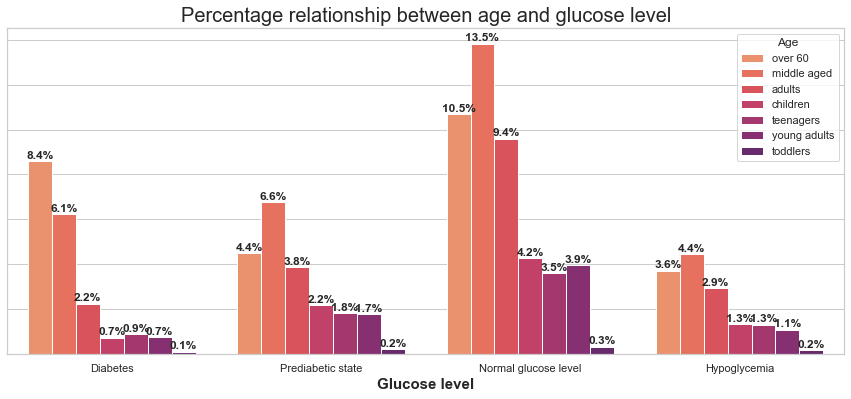

In [18]:
plik.loc[plik['age'] < 1, 'age range'] = 'toddlers'
plik.loc[(plik['age'] >= 1) & (plik['age'] < 10),'age range'] = 'children'
plik.loc[(plik['age'] >= 10) & (plik['age'] < 18), 'age range'] = 'teenagers'
plik.loc[(plik['age'] >= 18) & (plik['age'] < 25), 'age range'] = 'young adults'
plik.loc[(plik['age'] >= 25) & (plik['age'] < 40), 'age range'] = 'adults'
plik.loc[(plik['age'] >= 40) & (plik['age'] < 60), 'age range'] = 'middle aged'
plik.loc[plik['age'] >= 60, 'age range'] = 'over 60'

total = len(plik)

sns.set_theme(style="whitegrid")
plt.figure(figsize = (15,6))
plt.title("Percentage relationship between age and glucose level",fontsize = 20)
ax = sns.countplot(x = 'glucose level', data= plik, saturation = 2.5, palette = 'flare', hue = "age range")
plt.xlabel('Glucose level',fontsize=15,fontweight = "bold")
plt.legend(title='Age', loc='upper right')

for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x,y), ha = "center",fontweight = 'bold')

ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False)


Text(0, 0.5, 'Age')

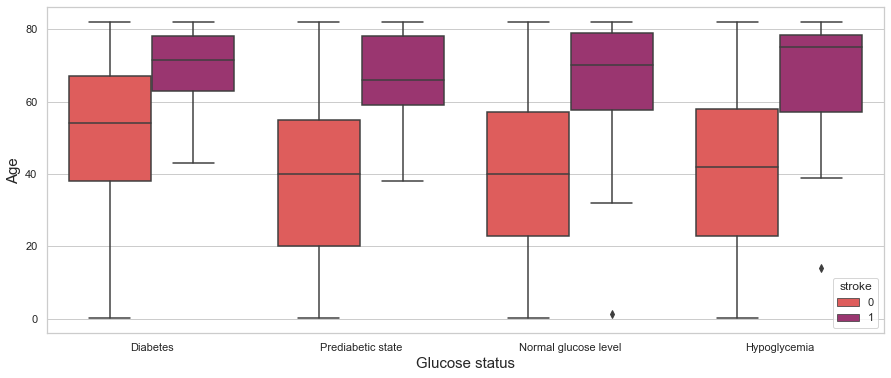

In [281]:
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid")
plik['gender'] = plik.loc[plik['gender'].isin(['Female', 'Male'])]
# plik['work type'] = plik.loc[plik['work type'].isin(['Self-employed'])]

g = sns.boxplot(x = 'glucose level',y='age', data=plik, palette='flare', hue= "stroke", saturation = 2.5)
g.set_xlabel("Glucose status",fontsize=15) and g.set_ylabel("Age",fontsize=15)

# End of part 2